In [2]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 567.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=3af54e229ab271ee728d64e4f2103ae35c0b92e0c41687b373fb90ccabfc13dd
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate

Resultados: {'11': 295, '01': 254, '10': 242, '00': 233}


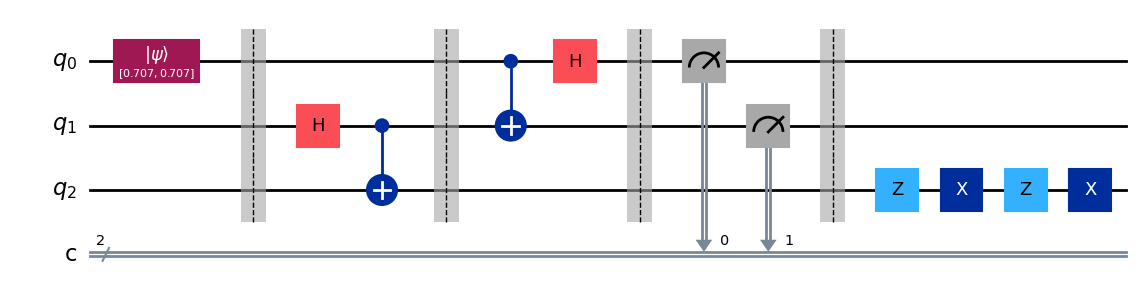

In [4]:
qc = QuantumCircuit(3,2)

#Estado de Alice |ψ⟩ = α|0⟩ + β|1⟩

alpha = 1/ np.sqrt(2)
beta = 1/ np.sqrt(2)
qc.initialize([alpha, beta], 0)
qc.barrier()

#Resto
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()

# Mediciones
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()

# Aplicar las puertas correspondientes
qc.z(2)
qc.x(2)
qc.z(2)
qc.x(2)


sim = Aer.get_backend('qasm_simulator')

my_circuit = transpile(qc, sim)
job1 = sim.run(my_circuit)

result = job1.result()
counts = result.get_counts()
print("Resultados:", counts)

# Dibujar el circuito
qc.draw('mpl')

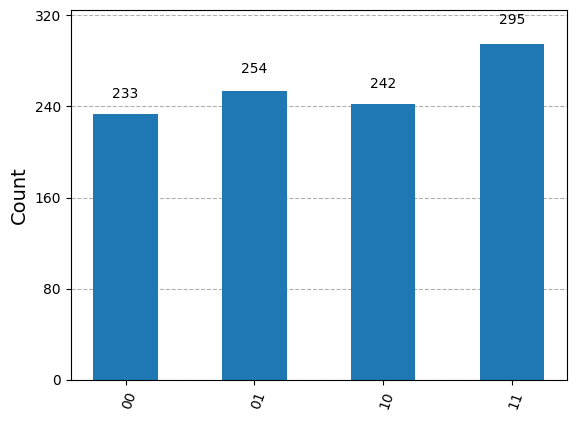

In [5]:
plot_histogram(counts)